<a href="https://colab.research.google.com/github/priya-200/Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Eligibility Analysis**

Dataset from : https://www.kaggle.com/datasets/ujjwalprakash/loan-eligibility

This notebook analyzes a dataset containing information about loans and customer profiles to determine loan eligibility and understand factors influencing loan status.

## **Dataset Overview**

The dataset contains the following features:

### **1. Loan Information**
- **Loan ID**: Unique identifier for a customer's loan.
- **Customer ID**: Unique identifier for a customer.
- **Loan Status**:
  - `chargedOff`: The loan is in default, and no further payment is expected.
  - `fullPaid`: The loan has been fully repaid.
- **Current Loan Amount**: The principal balance of the loan.
- **Term**: Indicates whether the loan is long-term or short-term.

### **2. Customer Financial Profile**
- **Credit Score**: The customer's creditworthiness score.
- **Annual Income**: Annual income of the customer.
- **Monthly Debt**: The customer's monthly debt payments.
- **Current Credit Balance**: The current balance on the customer's credit card.
- **Maximum Open Credit**: Maximum credit limit available on the customer's credit card.

### **3. Customer Employment and Residence**
- **Years in Current Job**: Number of years the customer has been in their current job.
- **Home Ownership**: The type of home ownership the customer has (e.g., own, mortgage, rent).

### **4. Credit History and Issues**
- **Years of Credit History**: The length of the customer's credit history in years.
- **Months Since Last Delinquent**: Number of months since the customer last defaulted on an EMI.
- **Number of Open Accounts**: Total number of open accounts (e.g., savings, current).
- **Number of Credit Problems**: The number of credit-related issues the customer has faced, such as late payment penalties.
- **Bankruptcies**: The number of times the customer has filed for bankruptcy.
- **Tax Liens**: The number of tax liens imposed on the customer.

### **5. Loan Purpose**
- **Purpose**: The reason for taking out the loan (e.g., debt consolidation, home improvement).

---

## **Steps in Analysis**
1. **Data Preprocessing**:
   - Handle missing values.
   - Encode categorical variables.
   - Normalize numerical features.
   
2. **Exploratory Data Analysis (EDA)**:
   - Analyze distributions of features.
   - Identify correlations between features and loan status.

3. **Feature Engineering**:
   - Create new features, such as debt-to-income ratio or credit utilization.

4. **Modeling**:
   - Split the data into training and testing sets.
   - Train classification models to predict loan status (`chargedOff` or `fullPaid`).

5. **Evaluation**:
   - Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.

---

## **Expected Outcomes**
- Identify key factors influencing loan eligibility.
- Develop a model that predicts the likelihood of a loan being charged off or fully paid.

---

### **Getting Started**
Ensure the following libraries are installed in your Colab environment:
- **Pandas**: For data manipulation.
- **NumPy**: For numerical operations.
- **Matplotlib/Seaborn**: For data visualization.
- **scikit-learn**: For machine learning models and preprocessing.

Run the following command to install missing libraries:
```python
!pip install pandas numpy matplotlib seaborn scikit-learn


## GET THE DATASE

In [ ]:
#!/bin/bash
!kaggle datasets download ujjwalprakash/loan-eligibility

Dataset URL: https://www.kaggle.com/datasets/ujjwalprakash/loan-eligibility
License(s): unknown
 35% 5.00M/14.3M [00:00<00:00, 24.4MB/s]
100% 14.3M/14.3M [00:00<00:00, 54.9MB/s]


In [ ]:
!unzip /content/loan-eligibility.zip -d /content/loan-eligibility

Archive:  /content/loan-eligibility.zip
  inflating: /content/loan-eligibility/loan eligibility.xlsx  


## IMPORT STATEMENTS

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
palette_color = sns.color_palette("rocket_r", as_cmap=True)

from scipy.stats import chi2_contingency
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

## LOAD THE DATASET.

In [ ]:
df = pd.read_excel("/content/loan-eligibility/loan eligibility.xlsx")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


## IMPORTANT FUNCTIONS.

In [ ]:
def remove_outliers(column, df):
    column_name = column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame and return the updated one
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [ ]:
def calculate_outlier_percentage(column, df):
    column_name = column
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

In [ ]:
def missing_percentage_column(df, column_name):
    missing_percentage = (df[column_name].isna().sum() / len(df)) * 100
    return missing_percentage

In [ ]:
def compare_numerical_with_target(column,target = 'Target'):
  correlation = df[column].corr(df[target])
  print(f"Correlation: {correlation}")

In [301]:
def compare_categorical_with_target(df, categorical_column, target_column='Target'):
    # Convert the categorical column to a string type if it appears to be numeric
    if pd.api.types.is_numeric_dtype(df[categorical_column]):
        print(f"Column '{categorical_column}' is numeric but treated as categorical.")
        df[categorical_column] = df[categorical_column].astype(str)

    # Frequency distribution of the categorical column and target
    cat_freq = df[categorical_column].value_counts()
    target_freq = df[target_column].value_counts()

    print(f"\nFrequency distribution of {categorical_column}:\n{cat_freq}\n")
    print(f"Frequency distribution of {target_column}:\n{target_freq}\n")

    # Cross-tabulation to check the relationship between the categorical column and the target
    cross_tab = pd.crosstab(df[categorical_column], df[target_column])
    print(f"\nCross-tabulation between {categorical_column} and {target_column}:\n{cross_tab}\n")

    # Chi-squared test for independence
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    print(f"Chi-squared test statistic: {chi2}")
    print(f"P-value: {p}")

    if p < 0.05:
        print(f"The categorical variable '{categorical_column}' has a statistically significant relationship with '{target_column}'.")
    else:
        print(f"The categorical variable '{categorical_column}' does not have a statistically significant relationship with '{target_column}'.")


## EXPLORATORY DATA ANALYSIS.

In [ ]:
df.shape # So we have 1 lakh recods with 19 rows to deal with.

(100000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

**INSIGHTS:**
1. Credit score,Annual income,Years in current job,Months since last delinquent,Maximum Open Credit,Bankruptcies,Tax Liens has null values
2. Years in current job should be a numerical column but now it is in object datatype

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.duplicated().sum() # Duplicated values will affect our models prediction so we can remove these duplicates.

10215

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(89785, 19)

#### Dataset missing percentages

In [ ]:
# Let's see the percentage of null values in each columns

null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage_df = null_percentage.reset_index()
null_percentage_df.columns = ['Column', 'Null Percentage']

null_percentage_df

,Column,Null Percentage
0,Loan ID,0.000000
1,Customer ID,0.000000
2,Loan Status,0.000000
3,Current Loan Amount,0.000000
4,Term,0.000000
5,Credit Score,21.333185
6,Annual Income,21.333185
7,Years in current job,4.234560
8,Home Ownership,0.000000
9,Purpose,0.000000


In [ ]:
# As the column Months since last delinquent has 53% of missing values we can drop it

df.drop(['Months since last delinquent'],axis = 1,inplace = True)

In [ ]:
# Let's see the unique values in each columns and percentage of the unique values
#of each columns by which we can divide the columns into categorical and numerical columns

unique_counts = df.nunique()
unique_percentage = (unique_counts / len(df)) * 100
unique_values_df = pd.DataFrame({
    'Unique Count': unique_counts,
    'Unique Percentage': unique_percentage
})
unique_values_df['Column Type'] = unique_values_df['Unique Count'].apply(
    lambda x: 'Categorical' if x < 10 else 'Numerical'
)
unique_values_df

,Unique Count,Unique Percentage,Column Type
Loan ID,81999,91.328173,Numerical
Customer ID,81999,91.328173,Numerical
Loan Status,2,0.002228,Categorical
Current Loan Amount,22004,24.507434,Numerical
Term,2,0.002228,Categorical
Credit Score,324,0.360862,Numerical
Annual Income,36174,40.289581,Numerical
Years in current job,11,0.012251,Numerical
Home Ownership,4,0.004455,Categorical
Purpose,16,0.017820,Numerical


In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

### Loan Status

In [ ]:
df['Loan Status'].unique() # Only two categorical values are there and this is the target column

array(['Fully Paid', 'Charged Off'], dtype=object)

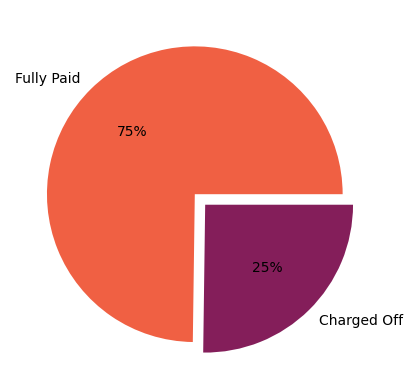

In [ ]:
# Let's see the composition of the combinations.

values_counts = df['Loan Status'].value_counts()
explode = [0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.show()

In [ ]:
df['Loan Status'].isna().sum()

0

In [ ]:
df.rename(columns={'Loan Status': 'Target'}, inplace=True)

In [ ]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

## DATA CLEANING

### Loan ID.

In [ ]:
df['Loan ID'].nunique() # nearly all the records have different id. This is not helpful for our model's prediction. So we can remove it

81999

In [ ]:
df.drop(['Loan ID'],axis = 1,inplace = True)

### Customer ID

In [ ]:
df['Customer ID'].nunique() # nearly all the records have different id. This is not helpful for our model's prediction. So we can remove it

81999

In [ ]:
df.drop(['Customer ID'],axis = 1,inplace = True)

###Current Loan Amount

In [ ]:
df['Current Loan Amount'].dtype # Okay it is integer datatype and we can just use transformation at last .

dtype('int64')

In [ ]:
df['Current Loan Amount'].isna().sum() # Okay no null values which is good for our model.

0

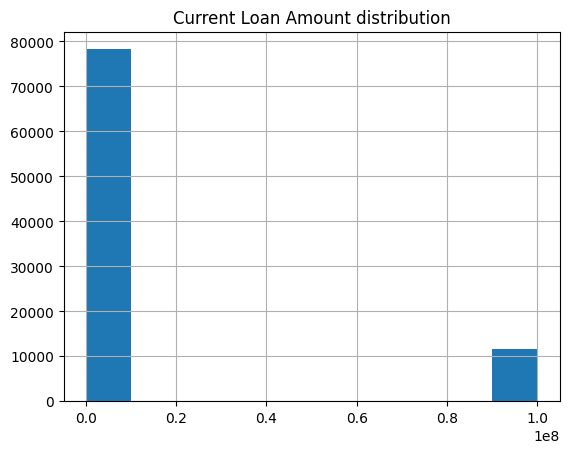

In [ ]:
df['Current Loan Amount'].hist()
plt.title("Current Loan Amount distribution")
plt.show()

In [ ]:
# Let's visualize the univariant analysis of this columns

df['Current Loan Amount'].nunique() # Despite of having 22004 unique vlaues the histogram graph shows us the data we are deailing with is a binary coloumn

# This indicate we need to counduct a investication about this  column

22004

In [ ]:
df.sort_values(by = "Current Loan Amount",ascending = False)['Current Loan Amount'].unique()[:20]

# By this we can see that there is a extream outlier called 99999999 which is actually affecting our visualization. This is evident by the box plot.

array([99999999,   789250,   789184,   789096,   789030,   788942,
         788876,   788788,   788722,   788634,   788568,   788480,
         788414,   788326,   788260,   788172,   788106,   788018,
         787952,   787864])

<Axes: ylabel='Current Loan Amount'>

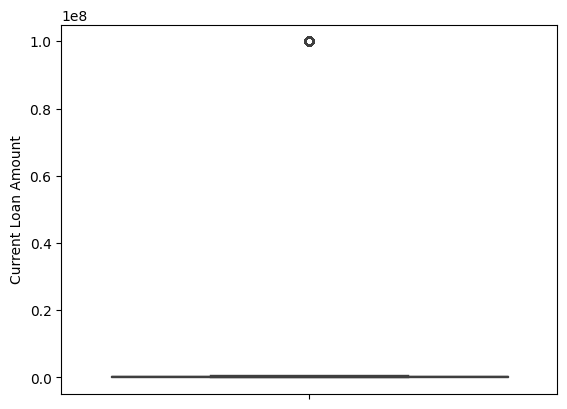

In [ ]:
sns.boxplot(df['Current Loan Amount']) # Our initution about the data is correct as there is a extream outlier in our dataset.

In [ ]:
(11484/89785)*100

12.790555215236399

In [ ]:
# Let's see how many records have that type of problem.

df[df['Current Loan Amount'] == 99999999]

# Nearly 11484 records has this type of outlier which is nearly ~12.79% of data which we don't want to waste.
# So will fill it with null value and then we will impute the values of this outliers which is a effective way for handelling this.

,Target,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,1,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
10,1,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,16,0,203965,289784.0,0.0,0.0
12,1,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,6,0,134083,220220.0,0.0,0.0
13,1,99999999,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,10,1,225549,496474.0,1.0,0.0
26,1,99999999,Short Term,724.0,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,6,0,138339,221232.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,1,99999999,Short Term,674.0,1058376.0,< 1 year,Home Mortgage,Other,11554.09,10.1,12,0,14098,333300.0,0.0,0.0
99971,1,99999999,Long Term,616.0,1530564.0,8 years,Rent,Medical Bills,13264.85,28.0,10,0,111283,162910.0,0.0,0.0
99990,1,99999999,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9,0,37392,134442.0,0.0,0.0
99996,1,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22,0,153045,509234.0,0.0,0.0


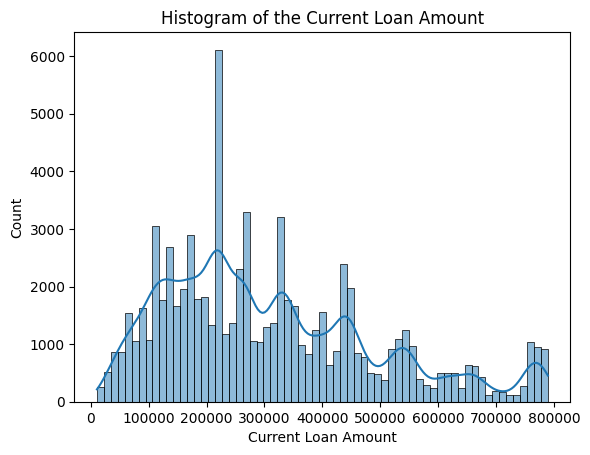

In [ ]:
# Replace the outlier with NaN and visualization.

df['Current Loan Amount'] = df['Current Loan Amount'].replace(99999999, np.nan)
sns.histplot(df['Current Loan Amount'],kde = True)
plt.title("Histogram of the Current Loan Amount")
plt.show() # I think there is a right skewnwss in the column tso let's see the skewness

In [ ]:
# Checking the skewness of the data

skewness = df['Current Loan Amount'].skew()
print(f"Skewness: {skewness}") # By intitution our data is moderately skewed distribution

Skewness: 0.7762313462329745


 **Skewness Interpretation**

- **0**: Perfectly symmetric distribution.
- **> 0**: Right (positive) skewed.
- **< 0**: Left (negative) skewed.
- **> 0.5 or < -0.5**: Moderately skewed; consider transformation.
- **> 1 or < -1**: Highly skewed; transformation is often necessary.

In [ ]:
# As the column is a skewed one we can just fill the missing value with the median of the column

df['Current Loan Amount'].fillna(df['Current Loan Amount'].median(),inplace = True)

Skewness: 0.9174483475957782


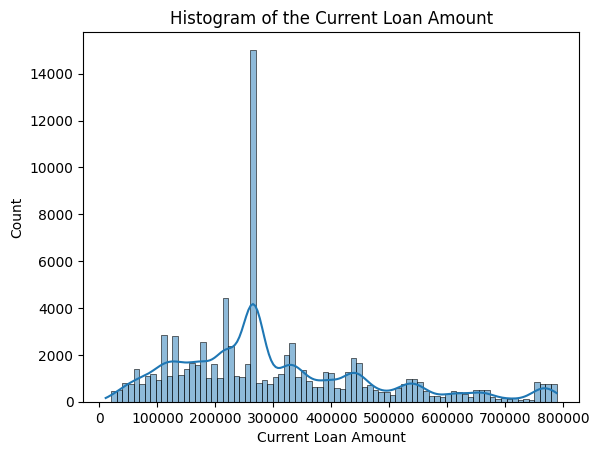

In [ ]:
# Now check the distribution and the skewness

skewness = df['Current Loan Amount'].skew()
print(f"Skewness: {skewness}")

sns.histplot(df['Current Loan Amount'],kde = True)
plt.title("Histogram of the Current Loan Amount")
plt.show()

#### Testing

In [ ]:
df['Current Loan Amount'].min(),df['Current Loan Amount'].max()

# As there is no negative or zero values in the data and the column is highly right skewed we should use log transformation

(10802.0, 789250.0)

In [ ]:
# Applying the logarithmic transformation

df['Current Loan Amount'] = np.log1p(df['Current Loan Amount'])

skewness = df['Current Loan Amount'].skew()
print(f"Skewness: {skewness}")

Skewness: -0.7390333294133185


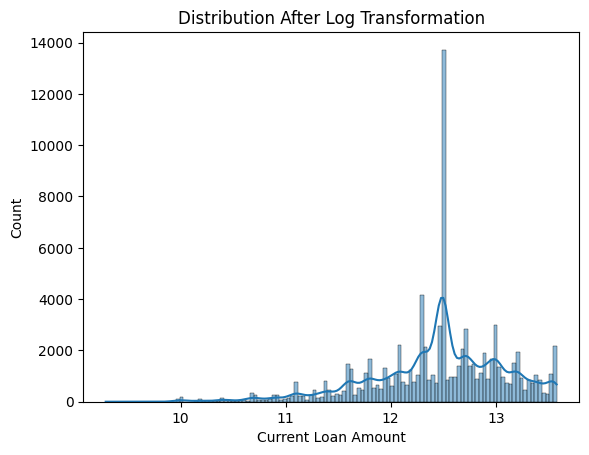

In [ ]:
# Visualizing the changes made by transformation

sns.histplot(df['Current Loan Amount'],kde = True)
plt.title("Distribution After Log Transformation")
plt.show()

We first checked the log transformationa and even after applying the log transformation the skewness still exist.So we change to **boxcox** Transformation which successfully reduced the skewness

#### Correct transformation

In [ ]:
df['Current Loan Amount'][89785]

245.67954983687747

In [ ]:
df['check'], _ = stats.boxcox(df['Current Loan Amount'] + 1)
df["check"].skew()

-0.011854054932493231

In [ ]:
df['check'][:5]

,check
0,320.202533
1,263.158508
2,264.608917
3,292.124253
4,227.023272


In [ ]:
# As this is a correct transformation we can drop the check column and change its values to Current loan aount column

df['Current Loan Amount'] = df['check']
df.drop(['check'],axis = 1,inplace = True)
df['Current Loan Amount']

,Current Loan Amount
0,320.202533
1,263.158508
2,264.608917
3,292.124253
4,227.023272
...,...
99994,242.552928
99996,264.608917
99997,186.003581
99998,341.569248


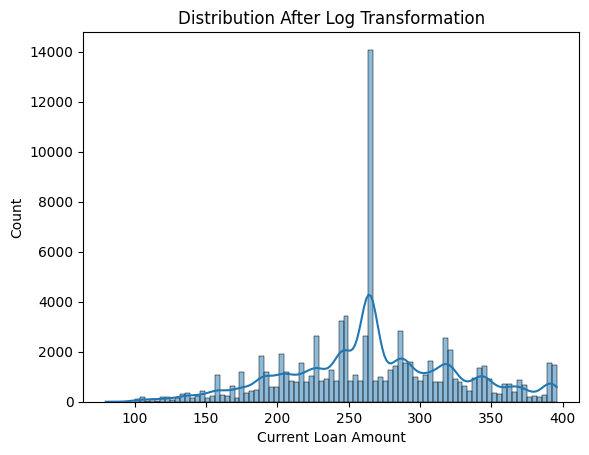

In [ ]:
sns.histplot(df['Current Loan Amount'],kde = True)
plt.title("Distribution After Log Transformation")
plt.show()

#### Outliers detection

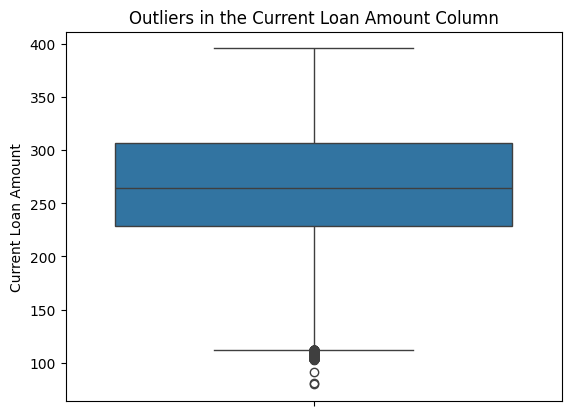

In [ ]:
sns.boxplot(df['Current Loan Amount'])
plt.title("Outliers in the Current Loan Amount Column")
plt.show()

In [ ]:
# We need to actually remove the outliers in our dataset so we use interquatile range

df = remove_outliers('Current Loan Amount', df)

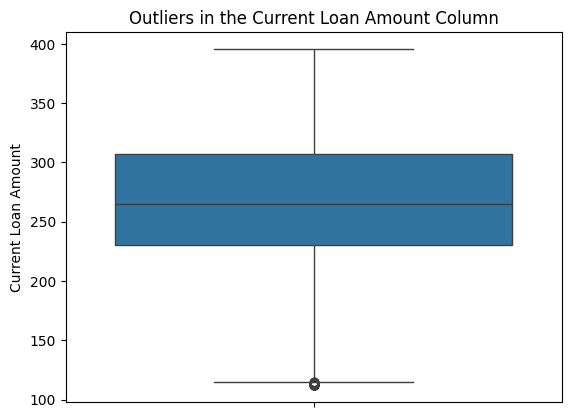

In [ ]:
sns.boxplot(df['Current Loan Amount'])
plt.title("Outliers in the Current Loan Amount Column")
plt.show() # Now we can see that the outliers are removed.

### Term

In [ ]:
df['Term'].dtype # The Column is a Object datatype

dtype('O')

In [ ]:
df['Term'].unique() # There are only 2 categorical column

array(['Short Term', 'Long Term'], dtype=object)

In [ ]:
df['Term'].isna().sum()

0

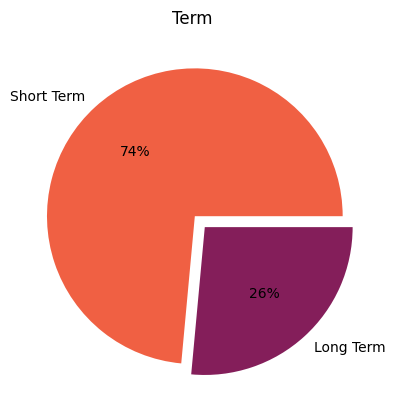

In [ ]:
# Visualising the Term column

values_counts = df['Term'].value_counts()
explode = [0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.title("Term ")
plt.show()

Encoding Categorical Data - "Term" Column

Given the context that the `"Term"` column has two categories with imbalanced distribution (74% 'Short Term' and 26% 'Long Term'):

* **Label Encoding** would be a reasonable choice since:
  * You have **only two categories**, so the relationship is simple and won't be misinterpreted by the model.
  * It doesn’t increase the dimensionality of the dataset (which is beneficial for performance).
  * For most models like **Decision Trees**, **Random Forests**, or **XGBoost**, Label Encoding will work fine without any issues.

* **One-Hot Encoding** could also be used, especially if you're working with **linear models** (like **Logistic Regression**) or models that assume a non-linear relationship. However, in this case, since there are only two categories, Label Encoding may be simpler and more efficient.

Key Takeaway:
- **Label Encoding** is a good choice when the categorical variable is binary or has an ordinal relationship and you are using tree-based models or want to avoid increasing the dimensionality unnecessarily.
- **One-Hot Encoding** is better suited for models that need explicit separation between categories (e.g., linear models), but for binary features, it may not provide a significant advantage over Label Encoding.

So, in your case, **Label Encoding** is likely the most efficient approach, especially if you're using tree-based models.


In [361]:
lable_encoding = LabelEncoder()
df['Term'] = label_encoder.fit_transform(df['Term'])

### Credit Score

In [ ]:
df['Credit Score'].dtype # It is a float data type

dtype('float64')

In [ ]:
df['Credit Score'].isna().sum()

19063

In [ ]:
# Percentage of the missing values.

print(f"The percentage of the missing values in the Credit Score column is {((df['Credit Score'].isna().sum() / df.shape[0]) * 100):.2f}%")

The percentage of the missing values in the Credit Score column is 21.32%


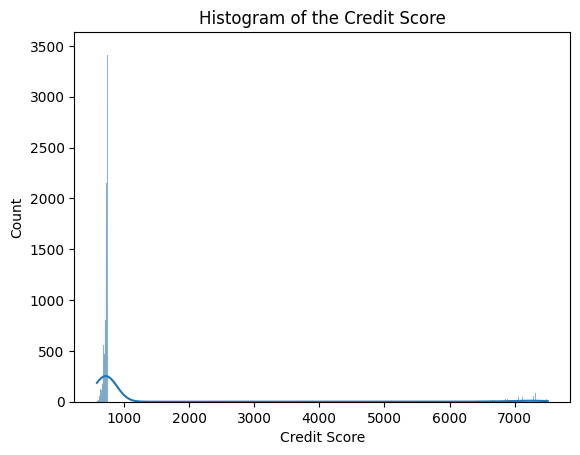

In [ ]:
# Visualizing the Credit Score column

sns.histplot(df['Credit Score'],kde = True)
plt.title("Histogram of the Credit Score")
plt.show() # The problem is similar to the before one

In [ ]:
df['Credit Score'].nunique()

324

In [ ]:
df.sort_values(by = 'Credit Score',ascending = False)['Credit Score'].unique()[:20]

# There are no as such outliers from the previous case but still there is a high skewness in the dataset

array([7510., 7500., 7490., 7480., 7470., 7460., 7450., 7440., 7430.,
       7420., 7410., 7400., 7390., 7380., 7370., 7360., 7350., 7340.,
       7330., 7320.])

In [ ]:
print(f"The Skewness of the credit score column is {df['Credit Score'].skew()}")

# From this skewness we can confirm that there is a high skewness in our column so we need to use some transformations.

The Skewness of the credit score column is 3.5576725895597767


In [ ]:
## To see if we should drop the column or retain the column it depends on the correlation or importances of the column on predicting the target column.

correlation = df['Credit Score'].corr(df['Target'])
print(f"Correlation: {correlation}") # As the column has a moderate corrlation with the target variable it is not suggestes to drop this column

Correlation: -0.4596444444519909


<Axes: ylabel='Credit Score'>

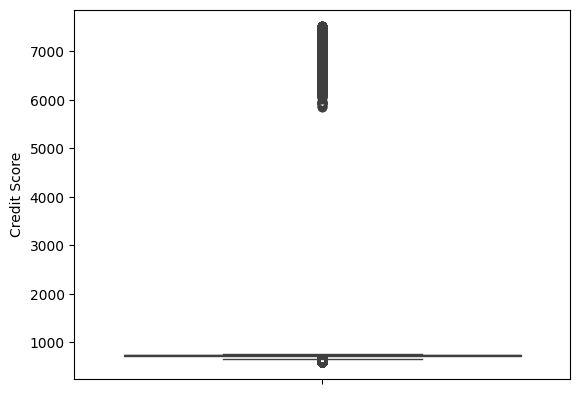

In [ ]:
## See for the outliers first.

sns.boxplot(df['Credit Score'])

In [ ]:
# Calculate the outliers percentage.

outlier_percentage = calculate_outlier_percentage('Credit Score', df)
print(f"The percentage of outliers is {outlier_percentage:.2f}%")

The percentage of outliers is 8.07%


In [ ]:
np.log1p(df['Credit Score'].fillna(np.nanmedian(df['Credit Score']))).skew()

# Filling the median in place of null values also didn't reduce the skewness.

4.062315180530925

#### Test Transformation

In [ ]:
df['Test'] = df['Credit Score'].fillna(np.median(df['Credit Score']))
def signed_log_transform(column):
    return np.sign(column) * np.log1p(np.abs(column))
df['Transformed_Test'] = signed_log_transform(df['Test'])

In [ ]:
df['Transformed_Test'].skew()
# This also did not reduce the skewness in the data

3.521337065614207

In [ ]:
df.drop(["Transformed_Test"],axis = 1,inplace = True)

In [ ]:
min_value = df['Test'].min()
if min_value < 0:
    df['Test_Adjusted'] = df['Test'] - min_value + 1
else:
    df['Test_Adjusted'] = df['Test']

# Apply the square root transformation
df['SquareRoot_Transformed'] = np.sqrt(df['Test_Adjusted'])

# Check the skewness after transformation
transformed_skewness = df['SquareRoot_Transformed'].skew()
print(f"Skewness after transformation: {transformed_skewness}")

# Square Root Transformation doesn't work here.

Skewness after transformation: 3.5466106733107847


In [ ]:
df.drop(['Test_Adjusted', 'SquareRoot_Transformed'],axis = 1,inplace = True)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df['Test'] = knn_imputer.fit_transform(df[['Credit Score']])

skewness_after_imputation = df['Test'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}") # KNN Imputation is also not working

Skewness after imputation: 4.01


In [ ]:
df['Test'] = np.log1p(df['Test'])

skewness_after_imputation = df['Test'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 3.29


#### Correct Transformation

In [ ]:
df['Test'] = df['Credit Score'].fillna(np.nanmedian(df['Credit Score']))
print(df['Test'].isna().sum())

0


In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Test']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 0.00


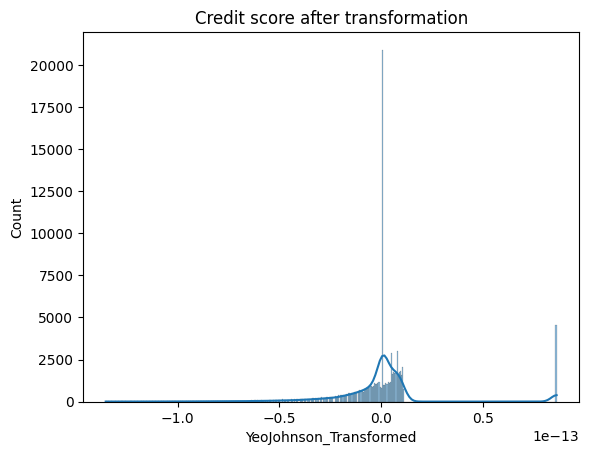

In [ ]:
sns.histplot(df['YeoJohnson_Transformed'],kde = True)
plt.title('Credit score after transformation')
plt.show()

13.803979465154514

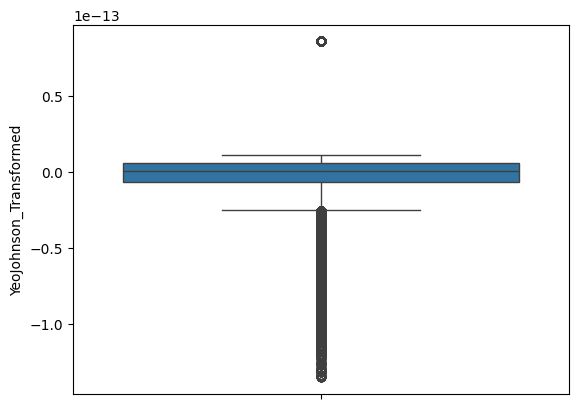

In [ ]:
sns.boxplot(df['YeoJohnson_Transformed'])
calculate_outlier_percentage('YeoJohnson_Transformed',df)

In [ ]:
df['Credit Score'] = df['YeoJohnson_Transformed']
df.drop(['Test','YeoJohnson_Transformed'],axis = 1,inplace = True)

In [ ]:
df['Credit Score'].skew()

0.0

In [ ]:
# We can test with both the dataset while training the model

df = remove_outliers('Credit Score',df)
df_outlier = df.copy()

<Axes: ylabel='Credit Score'>

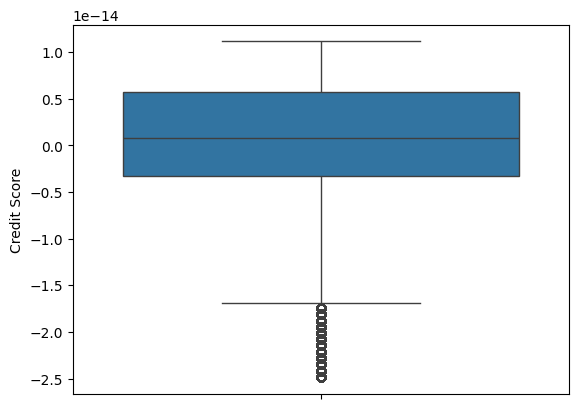

In [ ]:
sns.boxplot(df['Credit Score'])

### Annual Income

In [ ]:
df['Annual Income'].isna().sum()

19063

In [ ]:
missing_percentage_column(df,'Annual Income')

24.735619655624326

In [ ]:
df['Annual Income'].dtype

dtype('float64')

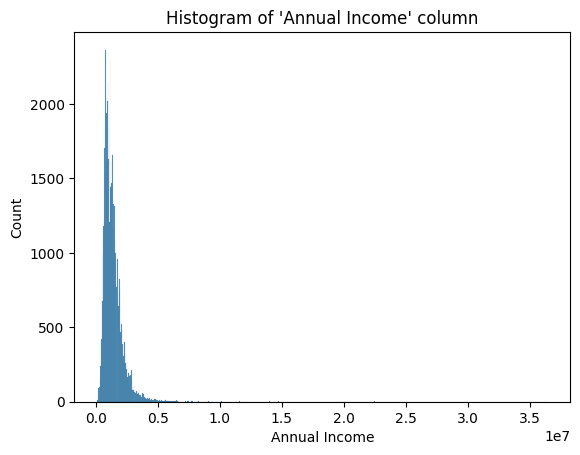

In [ ]:
sns.histplot(df['Annual Income'])
plt.title("Histogram of 'Annual Income' column")
plt.show()

In [ ]:
df['Annual Income'].skew() # This is also highly skewed

6.273575218174962

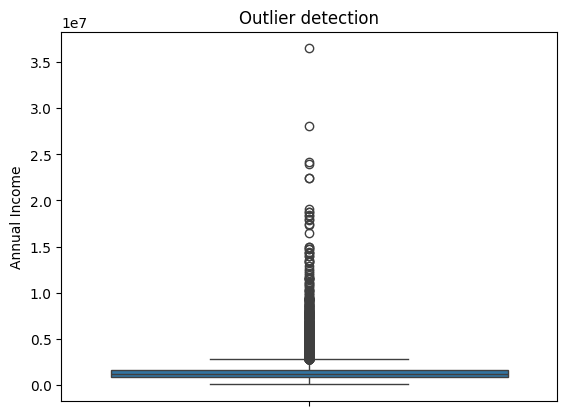

In [ ]:
sns.boxplot(df['Annual Income'])
plt.title("Outlier detection")
plt.show() # We can see that there are a lot of outliers in this columns

In [ ]:
calculate_outlier_percentage('Annual Income',df)

3.463220314791026

In [ ]:
compare_numerical_with_target('Annual Income') # As the correlation b/w the column and the target is very less we can drop this

# The other main reason for droping this column is that it has nearly 3% of its data as outlier and skewness is very high

KeyError: 'Annual Income'

In [ ]:
df.drop(['Annual Income'],axis = 1,inplace = True)

### Years in current job

In [ ]:
df['Years in current job'].isna().sum() # It has very less missing values

3224

In [ ]:
df['Years in current job'].dtype
# Years of experience should be a numerical column but as we can see it is a object so there is a problem in here.

dtype('O')

In [ ]:
df['Years in current job'][:3] # As we can see there is years in the values which make it a problem

,Years in current job
0,8 years
1,10+ years
2,8 years


In [ ]:
df['Years in current job'].nunique() # as the number of unique values is 11 it can be considered as a categorical column

11

In [ ]:
# Let's see which are the values in Years in current job

df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '4 years', '9 years', '7 years', '2 years', '1 year', nan,
       '6 years'], dtype=object)

In [ ]:
# So we first need to remove the 'year' string from the values

df['Years in current job'] = (df['Years in current job'].astype(str).str.replace(r'years?|year', '', regex=True).str.strip())
df['Years in current job'].unique()

array(['8', '10+', '3', '5', '< 1', '4', '9', '7', '2', '1', 'nan', '6'],
      dtype=object)

In [ ]:
# Now we need to convert the values to numeric columns.

# Replace 'nan' with np.nan
df['Years in current job'] = df['Years in current job'].replace('nan', np.nan)

# Replace '< 1' with 0
df['Years in current job'] = df['Years in current job'].replace('< 1', 0)

# Replace '10+' with 10
df['Years in current job'] = df['Years in current job'].replace('10+', 10)

# Convert the remaining values to integers
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')

df['Years in current job'].unique()

array([ 8., 10.,  3.,  5.,  0.,  4.,  9.,  7.,  2.,  1., nan,  6.])

In [ ]:
# Now that we converted it into a numerical column first will see the number of missing values

df['Years in current job'].isna().sum()

3224

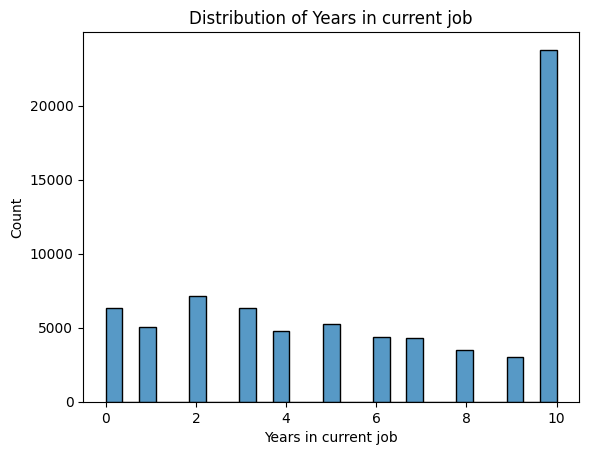

In [ ]:
# See the distribution of the data to fill the missing values.

sns.histplot(df['Years in current job'])
plt.title("Distribution of Years in current job")
plt.show()

In [ ]:
# As the missing values is very less we can just drop the missing values

df['Years in current job'].dropna(inplace = True)

### Home Ownership

In [ ]:
df['Home Ownership'].dtype # It is a object column

dtype('O')

In [ ]:
df['Home Ownership'].isna().sum() # There are no missing values which is good.

0

In [ ]:
df['Home Ownership'].nunique() # Okay it is a categorical column with only 4 different values.

4

In [ ]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

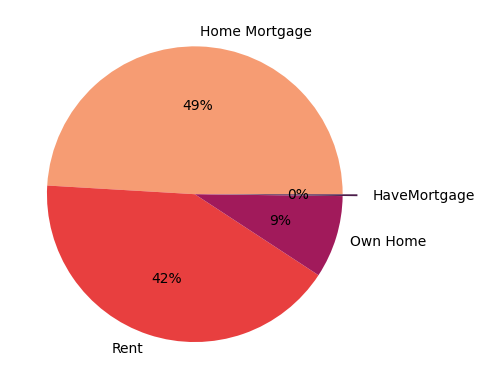

In [ ]:
# Let's visualize the composition

values_counts = df['Home Ownership'].value_counts()
explode = [0, 0, 0, 0.1]
colors = sns.color_palette("rocket_r", n_colors=len(values_counts))
plt.pie(values_counts, labels=values_counts.index, autopct='%.0f%%', explode=explode, colors=colors)
plt.show()

# By the composition we can see HaveMortgage is very less in percentage

In [ ]:
len(df[df['Home Ownership'] == 'HaveMortgage'])

157

In [ ]:
compare_categorical_with_target(df, 'Home Ownership', 'Target')
# As a Result we can say that this column is important to the prediction

Frequency distribution of Home Ownership:
Home Ownership
Home Mortgage    37812
Rent             32145
Own Home          6953
HaveMortgage       157
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    61519
0    15548
Name: count, dtype: int64


Cross-tabulation between Home Ownership and Target:
Target             0      1
Home Ownership             
HaveMortgage      20    137
Home Mortgage   6863  30949
Own Home        1419   5534
Rent            7246  24899

Chi-squared test statistic: 213.6688546271727
P-value: 4.690583715816915e-46
The categorical variable Home Ownership has a statistically significant relationship with Target.


In [ ]:
label_encoder = LabelEncoder()
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])

In [ ]:
df['Home Ownership'].unique() # Super changed into a numerical value.

array([1, 2, 3, 0])

### Purpose

In [ ]:
df['Purpose'].dtype # It is a object data type

dtype('O')

In [ ]:
df['Purpose'].isna().sum() # No missing value which is good

0

In [ ]:
df['Purpose'].nunique() # That's a quit lot number of categorical values

16

In [ ]:
df['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'Take a Trip', 'Other',
       'small_business', 'wedding', 'vacation', 'major_purchase',
       'Medical Bills', 'Educational Expenses', 'moving',
       'renewable_energy'], dtype=object)

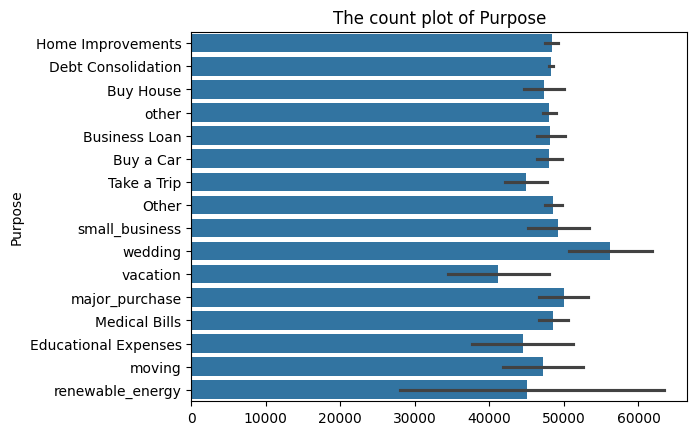

In [ ]:
sns.barplot(df['Purpose'])
plt.title("The count plot of Purpose")
plt.show()

In [ ]:
compare_categorical_with_target(df,'Purpose','Target')

# Okay the column has a significant values on the target column

Frequency distribution of Purpose:
Purpose
Debt Consolidation      61441
Home Improvements        4538
other                    4129
Other                    2457
Buy a Car                1049
Business Loan            1013
Medical Bills             788
Buy House                 442
Take a Trip               391
major_purchase            286
small_business            184
moving                     98
wedding                    94
Educational Expenses       80
vacation                   72
renewable_energy            5
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    61519
0    15548
Name: count, dtype: int64


Cross-tabulation between Purpose and Target:
Target                    0      1
Purpose                           
Business Loan           295    718
Buy House                83    359
Buy a Car               136    913
Debt Consolidation    12423  49018
Educational Expenses     13     67
Home Improvements       831   3707
Medical Bills           178    610

In [363]:
df['Purpose'] = lable_encoding.fit_transform(df['Purpose'])

### Monthly Debt

In [ ]:
df['Monthly Debt'].dtype

dtype('float64')

In [ ]:
df['Monthly Debt'].isna().sum()

0

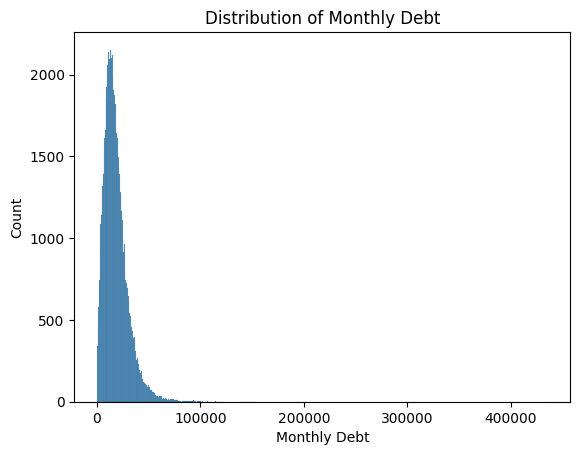

In [ ]:
# See the distribution of the Monthly Debt column

sns.histplot(df['Monthly Debt'])
plt.title("Distribution of Monthly Debt")
plt.show()

# By the graph we can see that the data we are dealing with has a high right skewness.

In [ ]:
df['Monthly Debt'].skew() # The skewness is very high

2.35909021095904

In [ ]:
np.log1p(df['Monthly Debt']).skew() # The log transformation didn't reduce the skewness

-2.291489011119188

In [ ]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Monthly Debt']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")
# We can see that the yeo-johnson transformation has significantly reduced our skewness

Skewness after imputation: 0.06


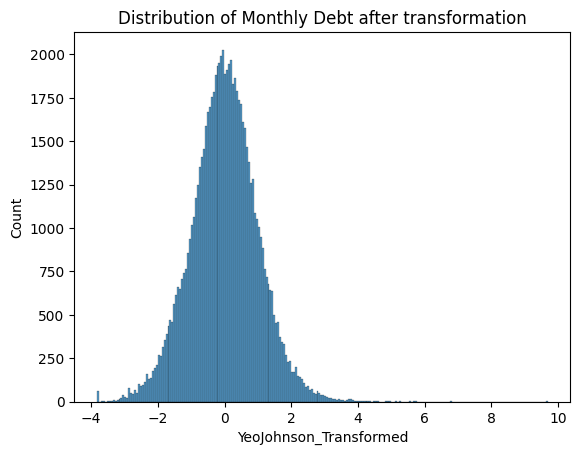

In [ ]:
sns.histplot(df['YeoJohnson_Transformed'])
plt.title("Distribution of Monthly Debt after transformation")
plt.show()

After Transformation : 1.745234665940026
Befor Transformation : 3.3996392749166313


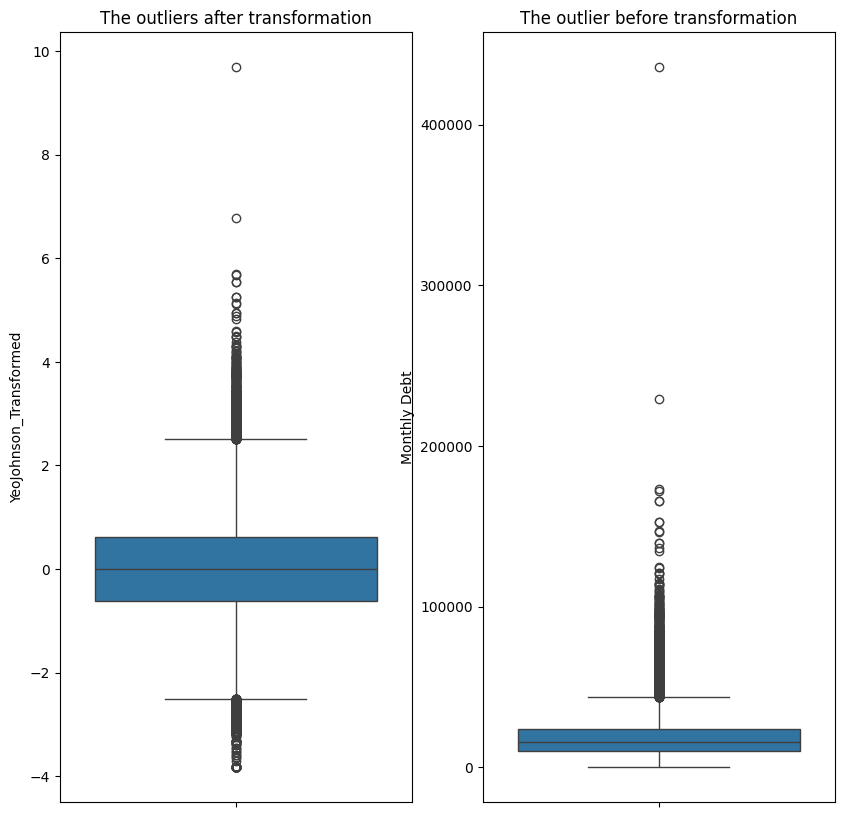

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.boxplot(df['YeoJohnson_Transformed'])
plt.title("The outliers after transformation")
print(f"After Transformation : {calculate_outlier_percentage('YeoJohnson_Transformed',df)}")

plt.subplot(1,2,2)
sns.boxplot(df['Monthly Debt'])
plt.title("The outlier before transformation")
print(f"Befor Transformation : {calculate_outlier_percentage('Monthly Debt',df)}")

In [ ]:
df['Monthly Debt'] = df['YeoJohnson_Transformed']
df.drop(['YeoJohnson_Transformed'],axis = 1,inplace = True)

In [ ]:
df['Monthly Debt'].skew()

0.056294297370737406

In [ ]:
df = remove_outliers('Monthly Debt',df) # Removing the outliers

### Years of Credit History

In [ ]:
df['Years of Credit History'].dtype # Okay it is float value

dtype('float64')

In [ ]:
df['Years of Credit History'].isna().sum() # Good that it doesn't have null values.

0

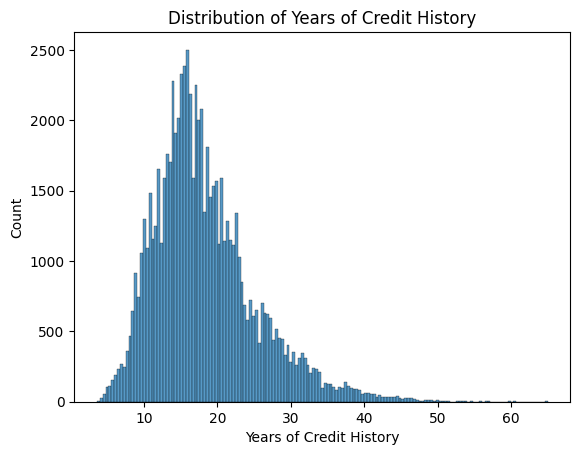

In [ ]:
# Check the distribution of the data

sns.histplot(df['Years of Credit History'])
plt.title("Distribution of Years of Credit History")
plt.show() # This does look like a skewed data but let's procede furture

In [ ]:
df['Years of Credit History'].skew() # Okay there is a skewness in the right tail

1.0704735940483392

In [ ]:
np.log1p(df['Years of Credit History']).skew() # The logiratumic transformation reduces the skewness

-0.055872443054164875

In [ ]:
df['Test'] = np.log1p(df['Years of Credit History']).skew()

In [ ]:
print(f"The percentage of outliers before transformation : {calculate_outlier_percentage('Years of Credit History',df)}")
print(f"The percentage of outliers after transformation : {calculate_outlier_percentage('Test',df)}")

The percentage of outliers before transformation : 3.0611975383640155
The percentage of outliers after transformation : 0.0


In [ ]:
compare_numerical_with_target('Test')

Correlation: -3.738249711961573e-16


In [ ]:
compare_numerical_with_target('Years of Credit History')

Correlation: 0.024461883744068123


In [ ]:
df['Years of Credit History'] = df['Test']
df.drop(['Test'],axis = 1,inplace = True)

### Number of Open Accounts

In [ ]:
df['Number of Open Accounts'].dtype

dtype('int64')

In [ ]:
df['Number of Open Accounts'].isna().sum()

0

In [ ]:
df['Number of Open Accounts'].nunique()

50

In [ ]:
df['Number of Open Accounts'].unique()

array([ 6, 35, 18,  9, 15, 13, 20, 16, 23, 10,  8,  4,  7, 12, 17,  5, 14,
       34, 11, 22, 19,  2, 21,  3, 25, 28, 24,  1, 30, 43, 27, 26, 36, 31,
       32, 29, 37, 33, 40, 41, 48, 39, 38, 56, 42, 45, 44, 52,  0, 76])

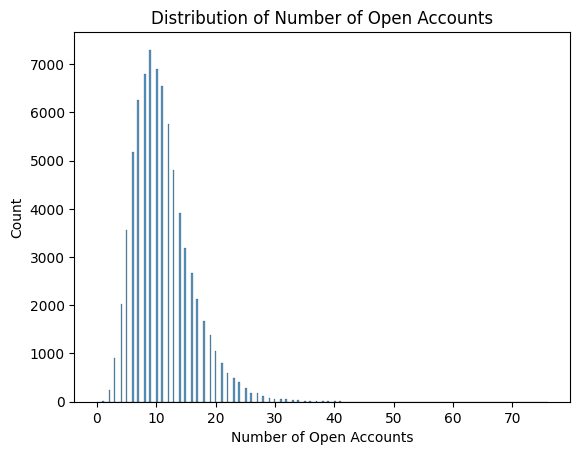

In [ ]:
# Let's visualize the distribution.

sns.histplot(df['Number of Open Accounts'])
plt.title("Distribution of Number of Open Accounts")
plt.show()

In [ ]:
df['Number of Open Accounts'].skew()

1.152175417521241

In [ ]:
compare_numerical_with_target('Number of Open Accounts')

Correlation: -0.010170997675326234


In [304]:
compare_categorical_with_target(df,'Number of Credit Problems','Target')


Frequency distribution of Number of Credit Problems:
Number of Credit Problems
0     65341
1      9012
2       942
3       280
4        90
5        30
6        11
7         8
8         3
10        2
11        1
15        1
9         1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    60405
0    15317
Name: count, dtype: int64


Cross-tabulation between Number of Credit Problems and Target:
Target                         0      1
Number of Credit Problems              
0                          13158  52183
1                           1858   7154
10                             0      2
11                             0      1
15                             0      1
2                            198    744
3                             65    215
4                             23     67
5                             10     20
6                              2      9
7                              2      6
8                              0      3
9                      

### Number of Credit Problems

In [ ]:
df['Number of Credit Problems'].dtype

dtype('int64')

In [ ]:
df['Number of Credit Problems'].isna().sum()

0

In [ ]:
df['Number of Credit Problems'].nunique()

13

In [ ]:
df['Number of Credit Problems'].unique()

array([ 1,  0,  2,  5,  4,  3,  7,  6, 11, 15, 10,  8,  9])

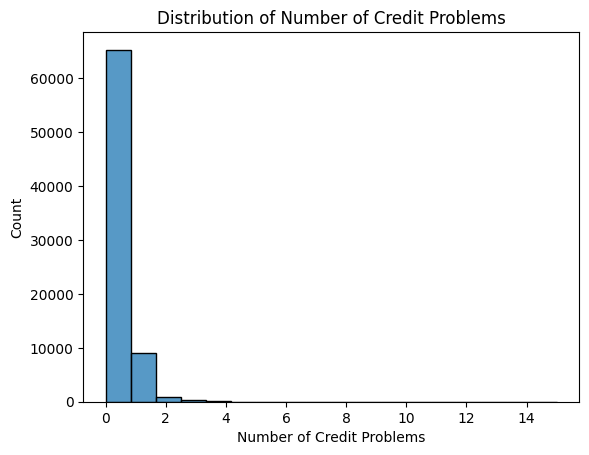

In [294]:
# Let's visualize the distribution.

sns.histplot(df['Number of Credit Problems'])
plt.title("Distribution of Number of Credit Problems")
plt.show()

<Axes: xlabel='Number of Credit Problems'>

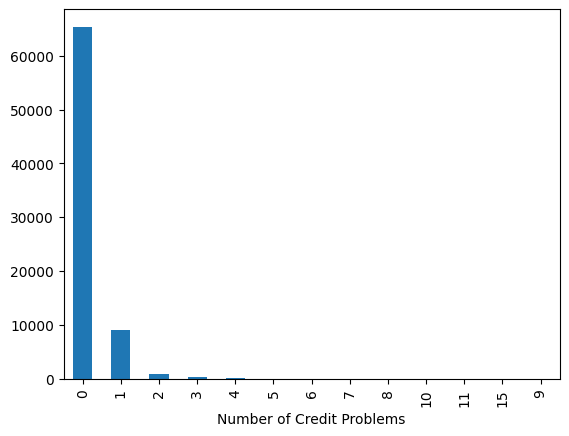

In [297]:
df['Number of Credit Problems'].value_counts().plot(kind='bar')

In [303]:
compare_categorical_with_target(df,'Number of Credit Problems','Target')
#As the correlation is very less we can leave this.

Column 'Number of Credit Problems' is numeric but treated as categorical.

Frequency distribution of Number of Credit Problems:
Number of Credit Problems
0     65341
1      9012
2       942
3       280
4        90
5        30
6        11
7         8
8         3
10        2
11        1
15        1
9         1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    60405
0    15317
Name: count, dtype: int64


Cross-tabulation between Number of Credit Problems and Target:
Target                         0      1
Number of Credit Problems              
0                          13158  52183
1                           1858   7154
10                             0      2
11                             0      1
15                             0      1
2                            198    744
3                             65    215
4                             23     67
5                             10     20
6                              2      9
7                            

In [365]:
df['Number of Credit Problems'] = df['Number of Credit Problems'].astype('float64')

### Current Credit Balance

In [306]:
df['Current Credit Balance'].dtype

dtype('int64')

In [307]:
df['Current Credit Balance'].nunique()

30223

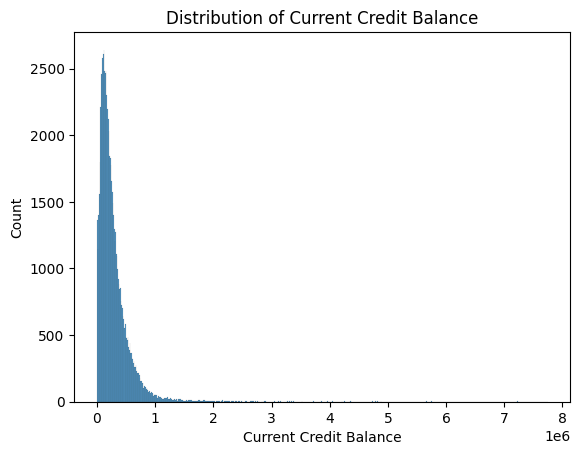

In [308]:
# So we need to check the distribution

sns.histplot(df['Current Credit Balance'])
plt.title("Distribution of Current Credit Balance")
plt.show()

In [309]:
df['Current Credit Balance'].skew() # The skewness is very high

6.120854654980168

In [313]:
transformer = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Transformed'] = transformer.fit_transform(df[['Current Credit Balance']])
skewness_after_imputation = df['YeoJohnson_Transformed'].skew()
print(f"Skewness after imputation: {skewness_after_imputation:.2f}")

Skewness after imputation: 0.17


Percentage of outliers(Before) = 5.112120651858112
Percentage of outliers(After) = 2.411452418055519


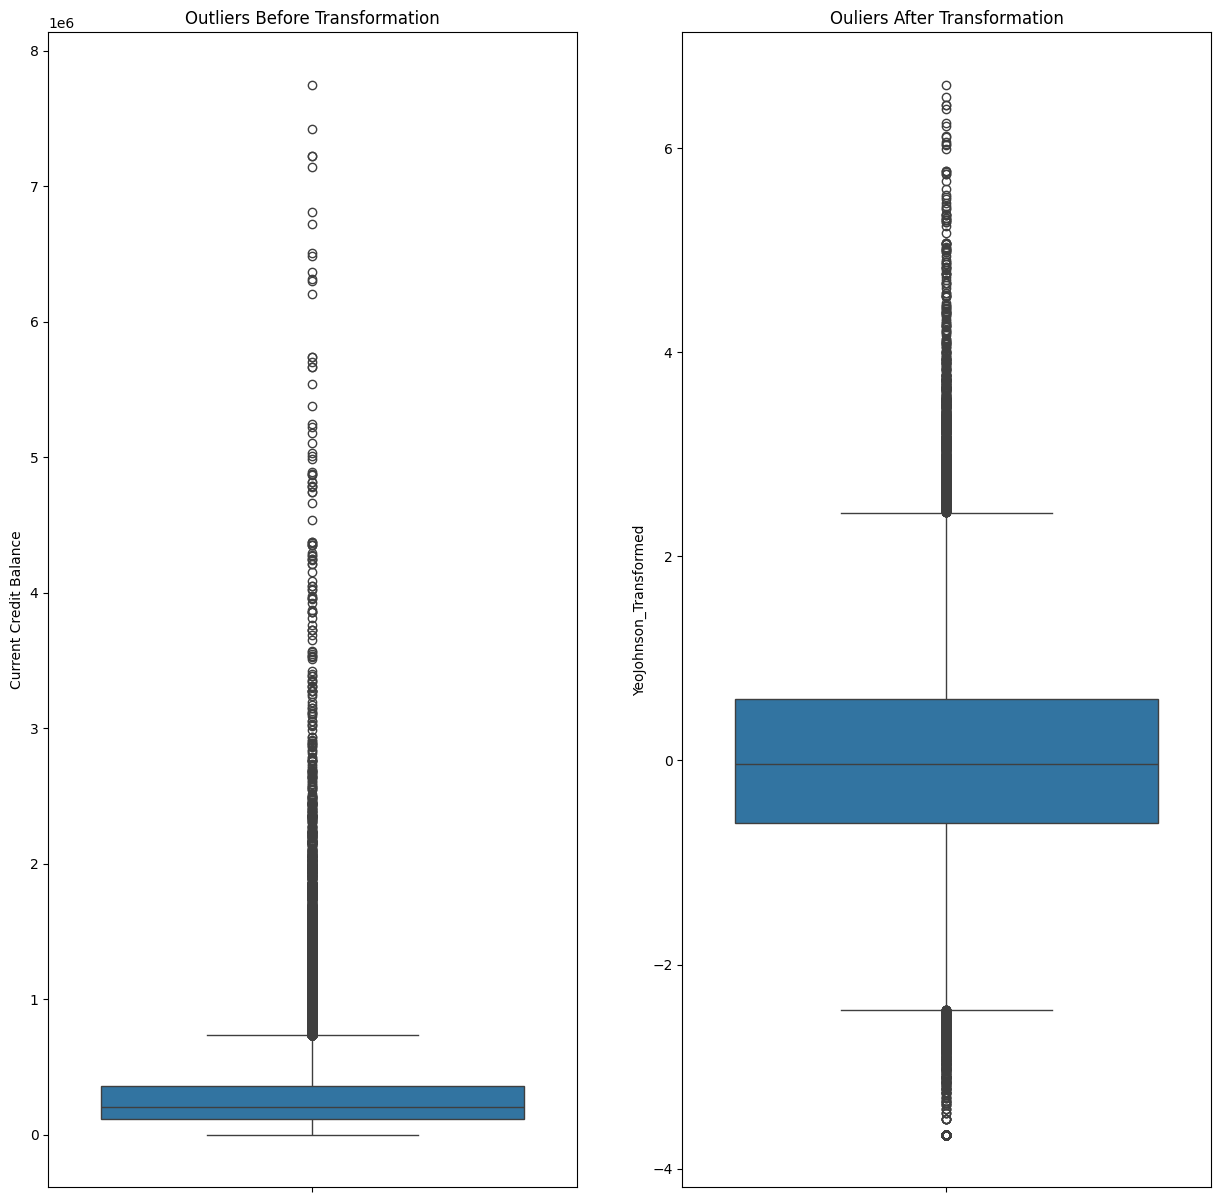

In [316]:
# Let's check for the outliers.

plt.figure(figsize = (15,15))

plt.subplot(1,2,1)
sns.boxplot(df['Current Credit Balance'])
plt.title("Outliers Before Transformation")
print(f"Percentage of outliers(Before) = {calculate_outlier_percentage('Current Credit Balance',df)}")

plt.subplot(1,2,2)
sns.boxplot(df['YeoJohnson_Transformed'])
plt.title("Ouliers After Transformation")
print(f"Percentage of outliers(After) = {calculate_outlier_percentage('YeoJohnson_Transformed',df)}")
plt.show()

# MAny data are considered as a outlier here.Let's check for percentage of outlier

In [317]:
compare_numerical_with_target('YeoJohnson_Transformed'),compare_numerical_with_target('Current Credit Balance')

Correlation: -0.0015756587628165683
Correlation: 0.009126643617187354


(None, None)

In [337]:
df.drop(['YeoJohnson_Transformed'],axis = 1,inplace = True)

### Maximum Open Credit

In [320]:
df['Maximum Open Credit'].dtype

dtype('float64')

In [321]:
df['Maximum Open Credit'].isna().sum()

1

In [322]:
df['Maximum Open Credit'].dropna(inplace = True)

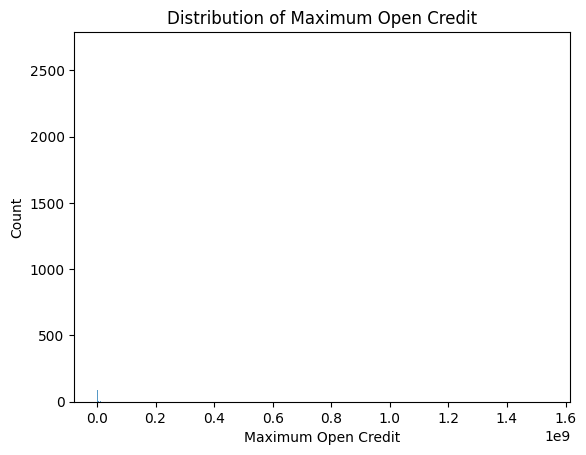

In [323]:
sns.histplot(df['Maximum Open Credit'],kde = True)
plt.title("Distribution of Maximum Open Credit")
plt.show() # Something is wrong with the column so we should investicate it

In [333]:
df['Maximum Open Credit'].skew()

117.86162053960089

In [328]:
l = (list(df['Maximum Open Credit'].unique()))
l.sort(reverse = True)

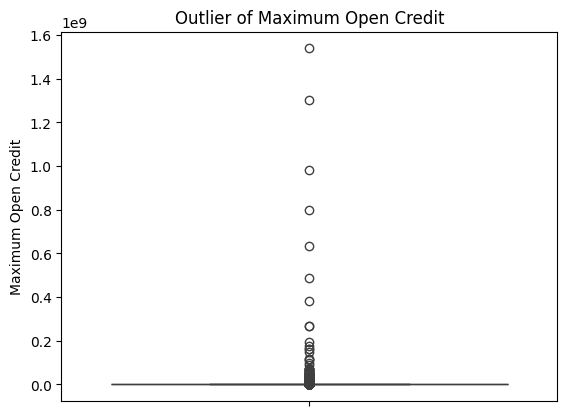

In [331]:
sns.boxplot(df['Maximum Open Credit'])
plt.title("Outlier of Maximum Open Credit")
plt.show()

In [332]:
calculate_outlier_percentage('Maximum Open Credit',df)

5.657536779271545

In [334]:
compare_numerical_with_target('Maximum Open Credit')

Correlation: 0.008442375565963589


In [335]:
df.drop(['Maximum Open Credit'],axis = 1,inplace = True)

### Bankruptcies

In [339]:
df['Bankruptcies'].dtype

dtype('float64')

In [340]:
df['Bankruptcies'].isna().sum()

150

In [341]:
df['Bankruptcies'].nunique()

8

In [342]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

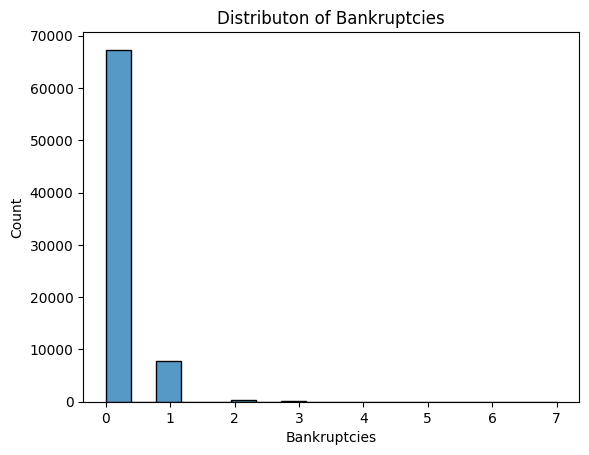

In [343]:
sns.histplot(df['Bankruptcies'])
plt.title("Distributon of Bankruptcies")
plt.show()

In [344]:
compare_categorical_with_target(df,'Bankruptcies')

Column 'Bankruptcies' is numeric but treated as categorical.

Frequency distribution of Bankruptcies:
Bankruptcies
0.0    67308
1.0     7855
2.0      313
nan      150
3.0       72
4.0       19
5.0        3
7.0        1
6.0        1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    60405
0    15317
Name: count, dtype: int64


Cross-tabulation between Bankruptcies and Target:
Target            0      1
Bankruptcies              
0.0           13614  53694
1.0            1586   6269
2.0              61    252
3.0              14     58
4.0               5     14
5.0               1      2
6.0               0      1
7.0               0      1
nan              36    114

Chi-squared test statistic: 2.725616915066451
P-value: 0.9503797581659346
The categorical variable 'Bankruptcies' does not have a statistically significant relationship with 'Target'.


In [367]:
df['Bankruptcies'] = df['Bankruptcies'].astype('float64')

### Tax Liens

In [346]:
df['Tax Liens'].dtype

dtype('float64')

In [347]:
df['Tax Liens'].nunique()

12

In [348]:
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [351]:
df['Tax Liens'].value_counts()

,count
Tax Liens,
0.0,74344
1.0,966
2.0,256
3.0,84
4.0,39
5.0,9
6.0,8
7.0,5
9.0,2


In [352]:
compare_categorical_with_target(df,'Tax Liens')

Column 'Tax Liens' is numeric but treated as categorical.

Frequency distribution of Tax Liens:
Tax Liens
0.0     74344
1.0       966
2.0       256
3.0        84
4.0        39
5.0         9
6.0         8
nan         6
7.0         5
9.0         2
11.0        1
15.0        1
10.0        1
Name: count, dtype: int64

Frequency distribution of Target:
Target
1    60405
0    15317
Name: count, dtype: int64


Cross-tabulation between Tax Liens and Target:
Target         0      1
Tax Liens              
0.0        15008  59336
1.0          212    754
10.0           0      1
11.0           0      1
15.0           0      1
2.0           51    205
3.0           27     57
4.0           13     26
5.0            2      7
6.0            1      7
7.0            2      3
9.0            1      1
nan            0      6

Chi-squared test statistic: 18.3103174563322
P-value: 0.10658795001440388
The categorical variable 'Tax Liens' does not have a statistically significant relationship with 'Target'.


In [369]:
df['Tax Liens'] = df['Tax Liens'].astype('float64')

### Years of Credit History

In [354]:
df['Years of Credit History'].dtype

dtype('float64')

In [355]:
df['Years of Credit History'].nunique()

1

In [356]:
df.drop(['Years of Credit History'],axis = 1,inplace = True)

In [357]:
df.columns

Index(['Target', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Correlation matrixs

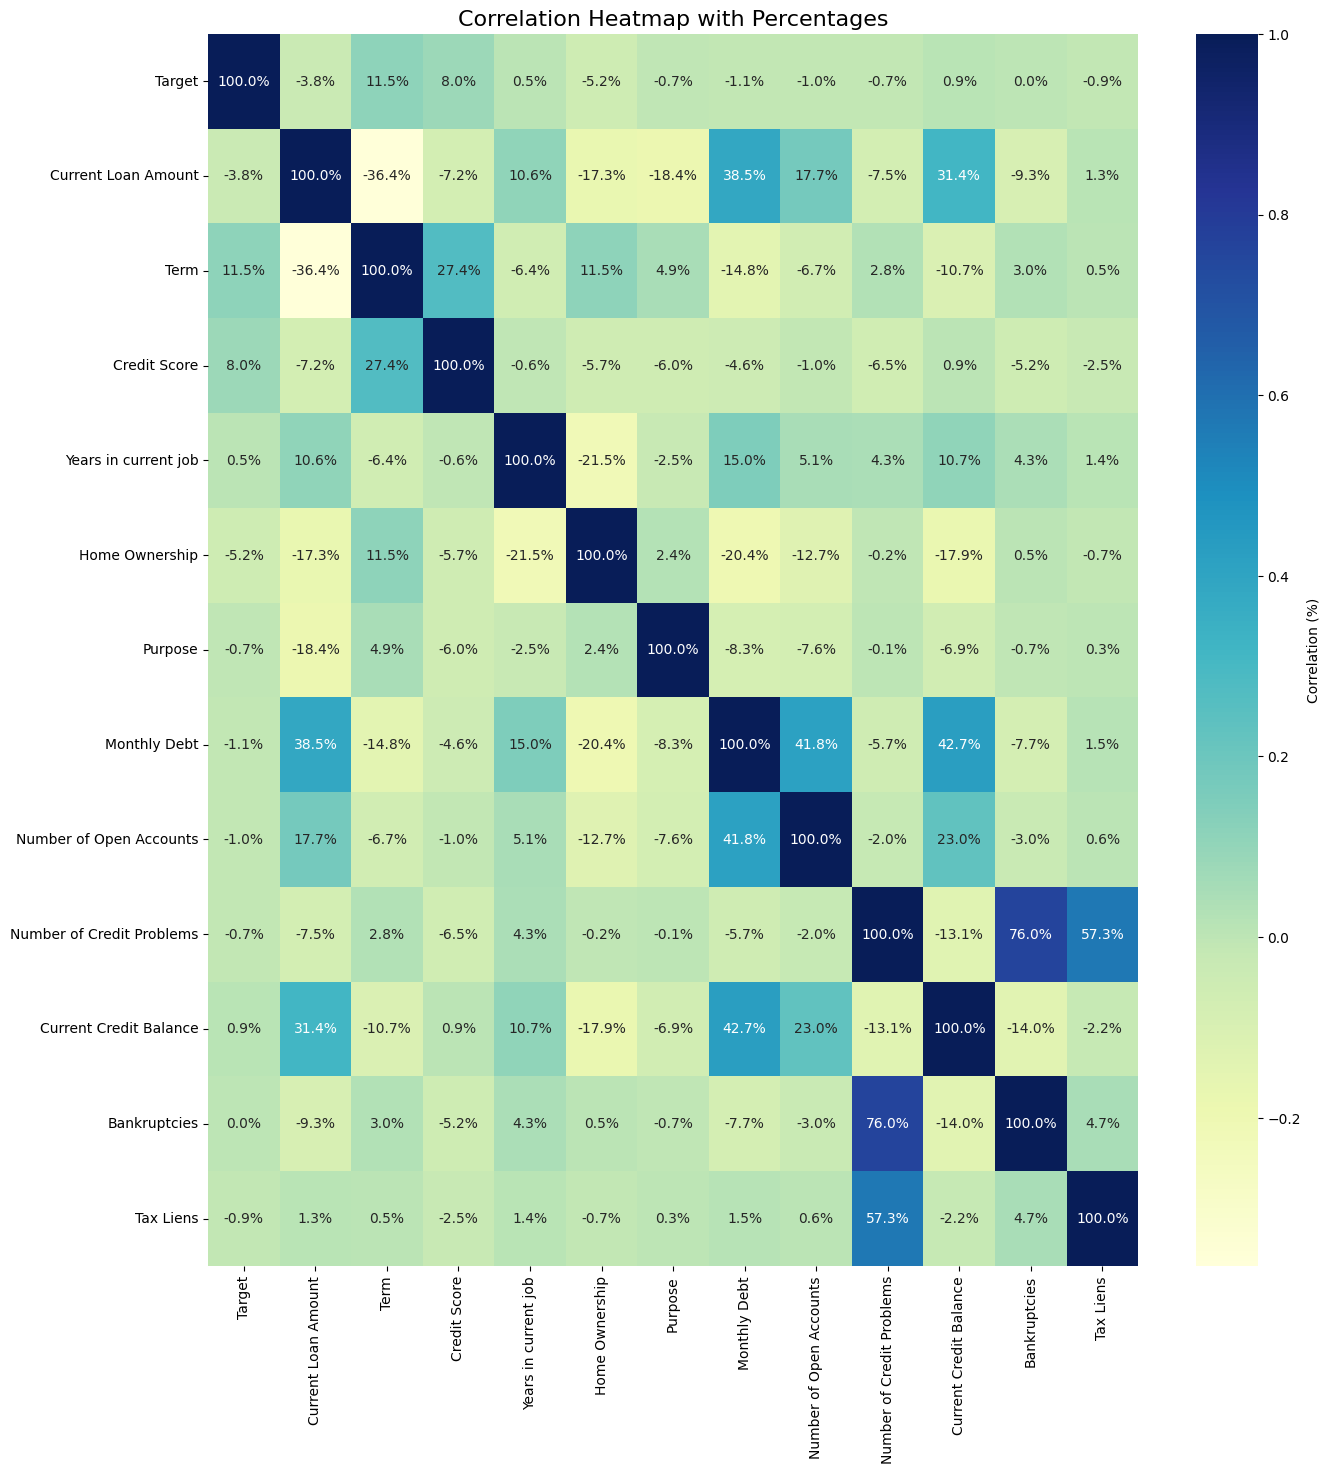

In [373]:
plt.figure(figsize = (15,16))
corr_mat = df.corr()
sns.heatmap(
    corr_mat,
    cmap="YlGnBu",
    annot=True,
    fmt=".1%",
    annot_kws={"size": 10},
    cbar_kws={"label": "Correlation (%)"},
)

plt.title("Correlation Heatmap with Percentages", fontsize=16)
plt.show()

In [374]:
corr_mat

,Target,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Target,1.000000,-0.038239,0.115364,0.080391,0.004562,-0.052305,-0.006613,-0.010635,-0.010171,-0.007498,0.009127,0.000435,-0.008947
Current Loan Amount,-0.038239,1.000000,-0.364247,-0.072358,0.105786,-0.173296,-0.184273,0.385326,0.177009,-0.075202,0.314424,-0.093439,0.012818
Term,0.115364,-0.364247,1.000000,0.274446,-0.064181,0.115216,0.048623,-0.147506,-0.066809,0.027806,-0.107155,0.029614,0.004561
Credit Score,0.080391,-0.072358,0.274446,1.000000,-0.006488,-0.056794,-0.060386,-0.045779,-0.010372,-0.065493,0.008508,-0.051826,-0.024938
Years in current job,0.004562,0.105786,-0.064181,-0.006488,1.000000,-0.215267,-0.025169,0.150206,0.050989,0.042949,0.106593,0.042595,0.014039
Home Ownership,-0.052305,-0.173296,0.115216,-0.056794,-0.215267,1.000000,0.023752,-0.203680,-0.126851,-0.002067,-0.179356,0.004562,-0.007375
Purpose,-0.006613,-0.184273,0.048623,-0.060386,-0.025169,0.023752,1.000000,-0.082959,-0.075715,-0.000920,-0.068994,-0.007130,0.002569
Monthly Debt,-0.010635,0.385326,-0.147506,-0.045779,0.150206,-0.203680,-0.082959,1.000000,0.417845,-0.056637,0.426829,-0.077053,0.015443
Number of Open Accounts,-0.010171,0.177009,-0.066809,-0.010372,0.050989,-0.126851,-0.075715,0.417845,1.000000,-0.019833,0.229843,-0.030148,0.006030
Number of Credit Problems,-0.007498,-0.075202,0.027806,-0.065493,0.042949,-0.002067,-0.000920,-0.056637,-0.019833,1.000000,-0.130905,0.760318,0.573109


In [375]:
df.to_csv("Cleaned pa at last.csv")

In [376]:
df.drop(['Years in current job','Tax Liens','Number of Open Accounts','Tax Liens','Bankruptcies'],axis = 1,inplace = True)

#HERE

## IMPORTANT POINTS

So the target column has imbalance data.We must focus on this problem.

* Years Of Credit History and Number of Open Accounts has very less correlation witht the target
* Number of Credit Problems less correlation
* Current Credit Balance Less correlation
* Bankruptcies no importance
* Tax Liens' no importance

In [358]:
df.columns

Index(['Target', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Pipeline: